# Regresión lógística binomial

## Carga de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [ ]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

## Manejo de datos nulos

In [ ]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_data.dropna(inplace=True)

## Eliminar id

In [ ]:
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df_data.drop('customerID', axis=1, inplace=True)

## Convertir a numérico variable objetivo

In [ ]:
df_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [ ]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [ ]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [ ]:
import matplotlib.pyplot as plt

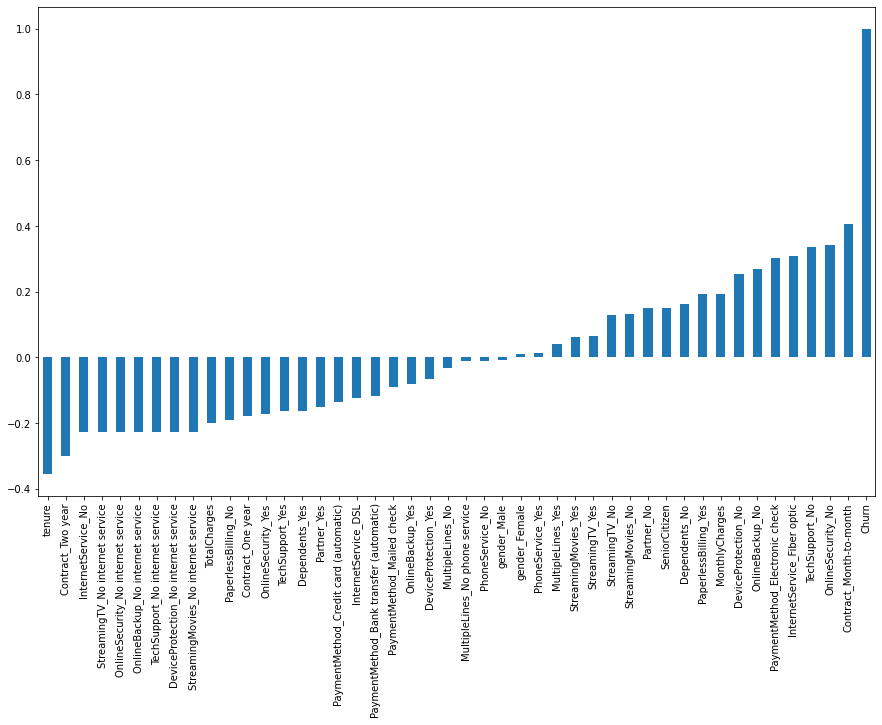

In [ ]:
fig = plt.figure(figsize=(15, 9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [ ]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [ ]:
df_data_processing_scaled.columns = df_data_processing.columns

In [ ]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [ ]:
import seaborn as sns

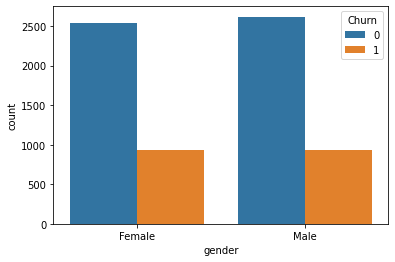

In [ ]:
sns.countplot(data=df_data, x='gender', hue='Churn')
plt.show()

In [ ]:
def plot_categorical(column):
  fig = plt.figure(figsize=(10, 10))
  sns.countplot(data=df_data, x=column, hue='Churn')
  plt.show()

In [ ]:
column_cat=df_data.select_dtypes(include='object').columns

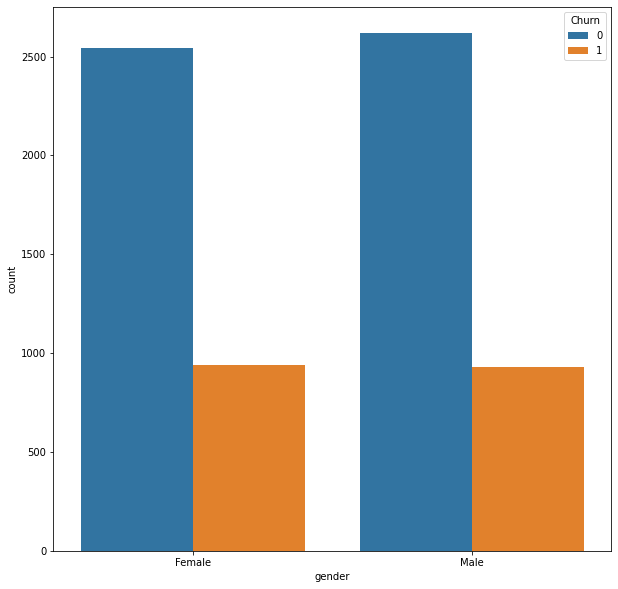

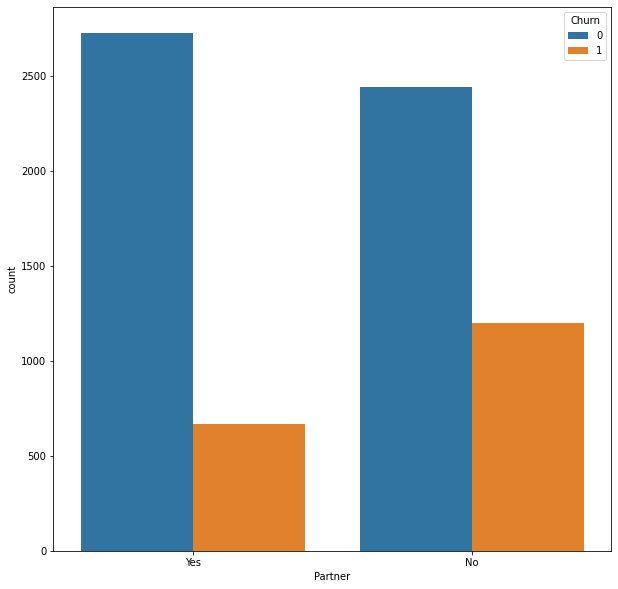

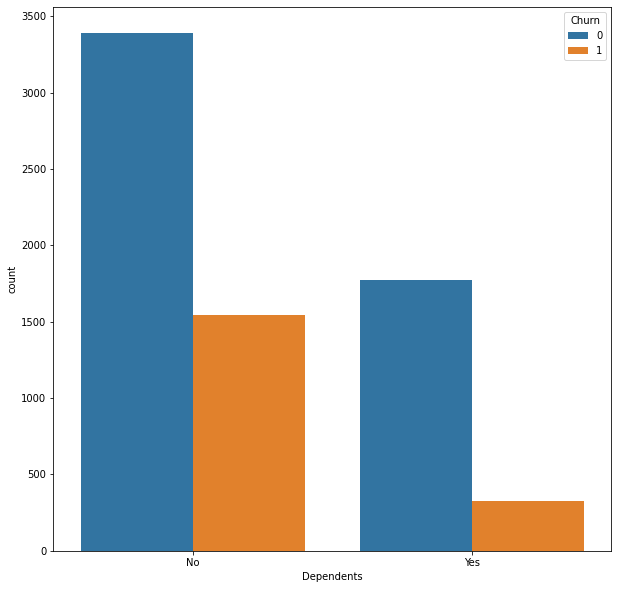

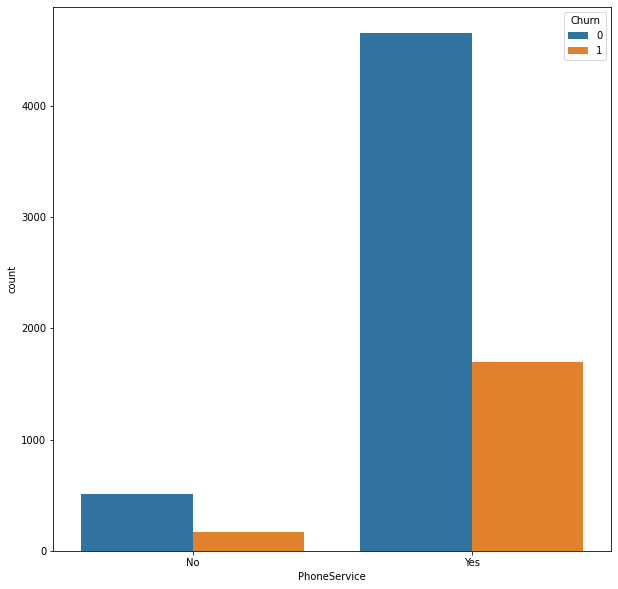

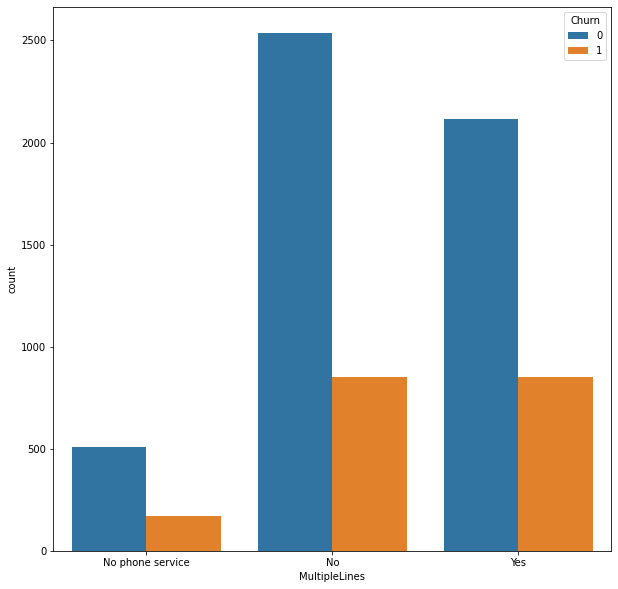

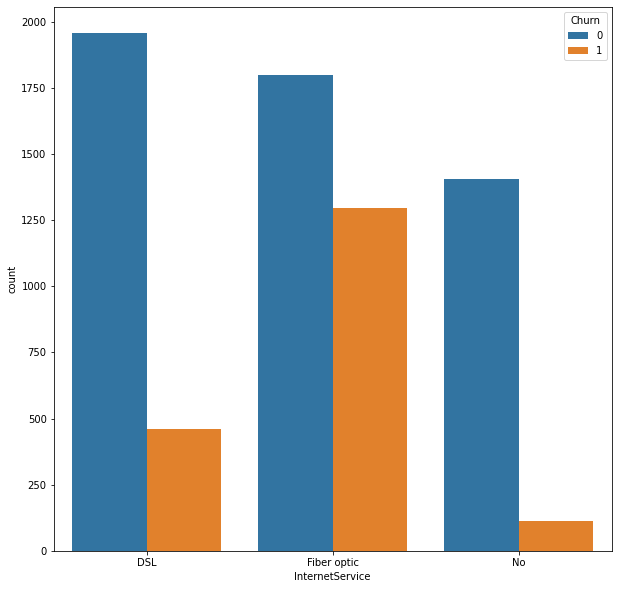

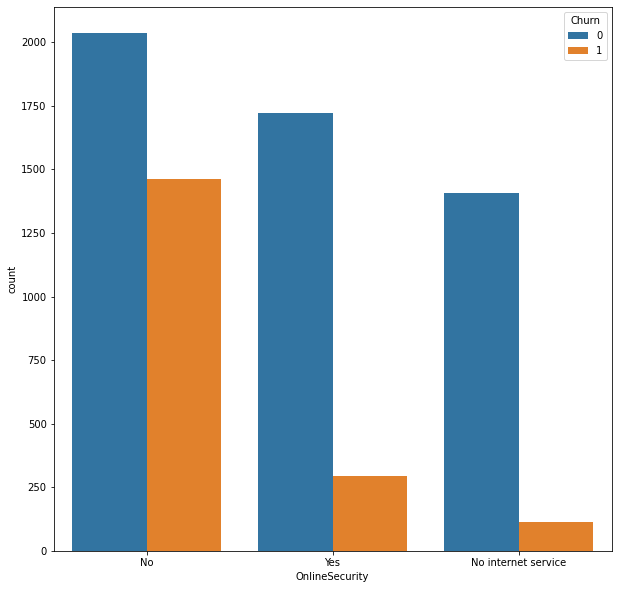

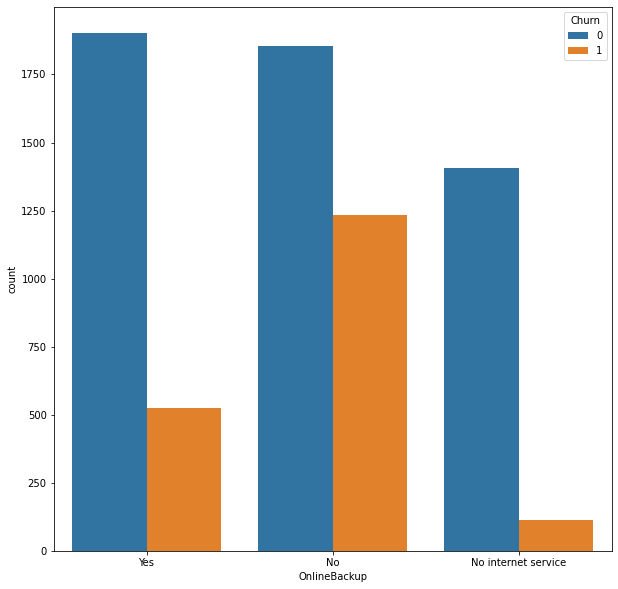

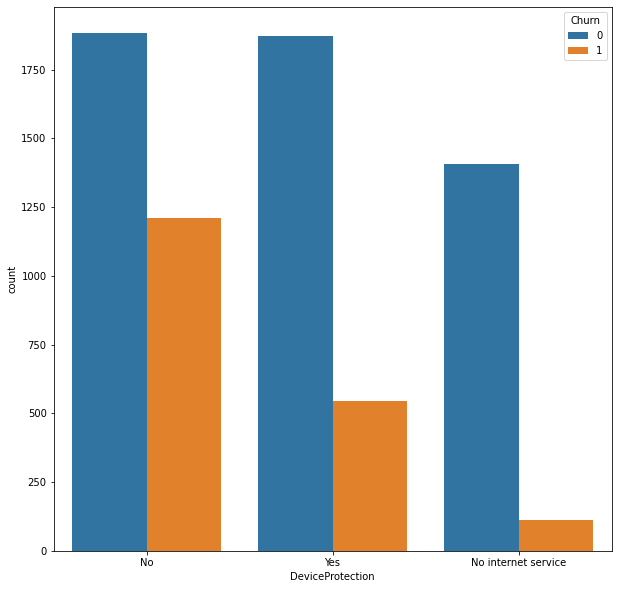

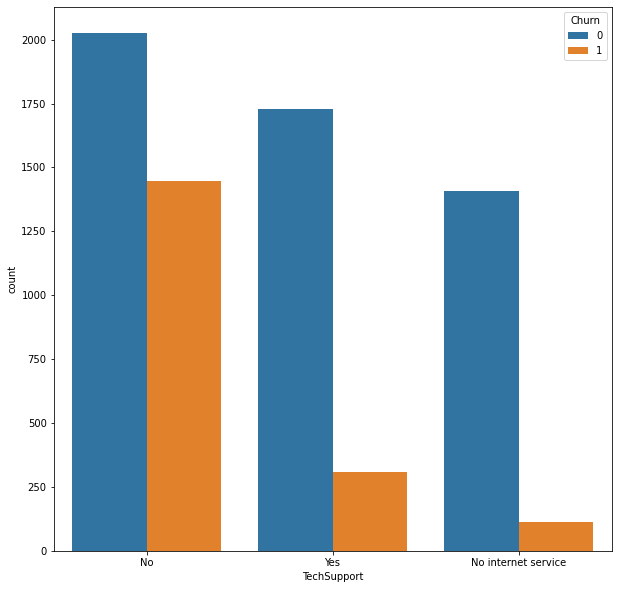

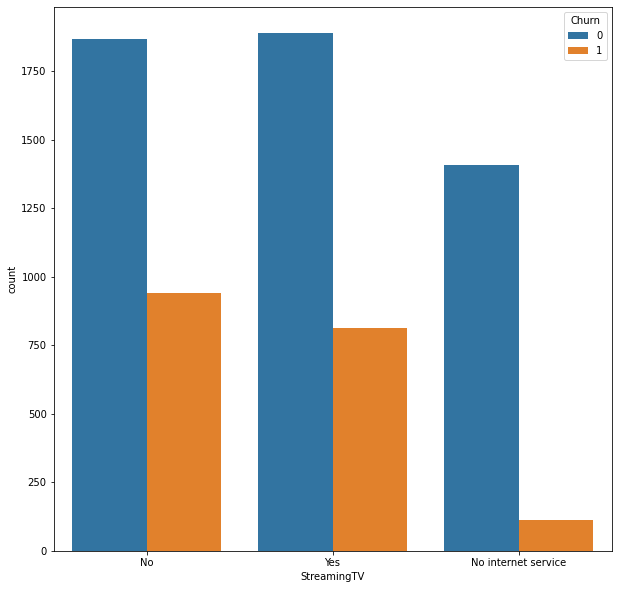

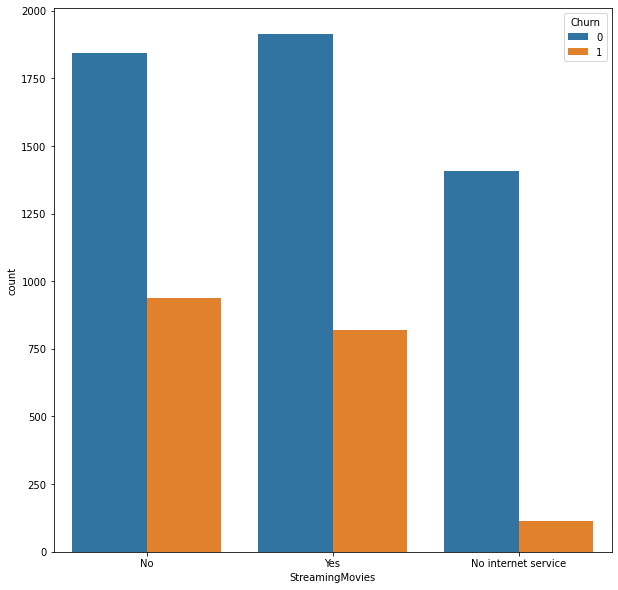

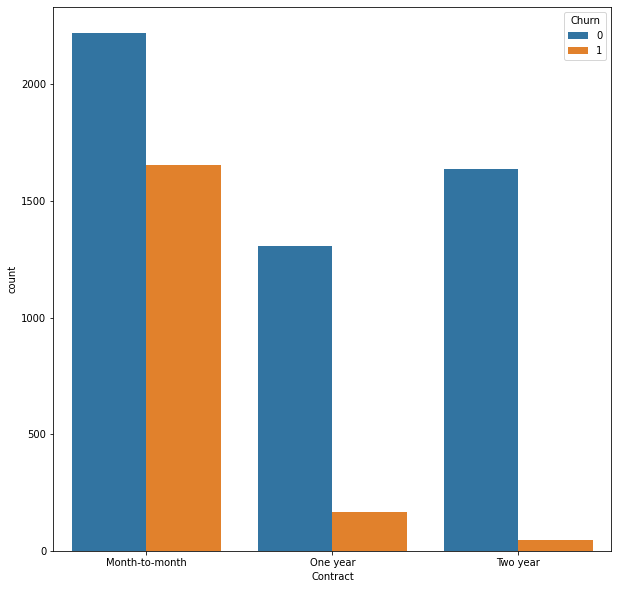

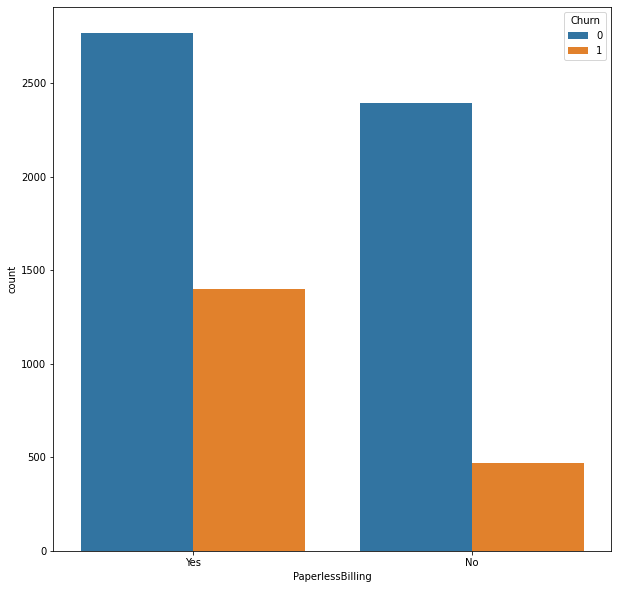

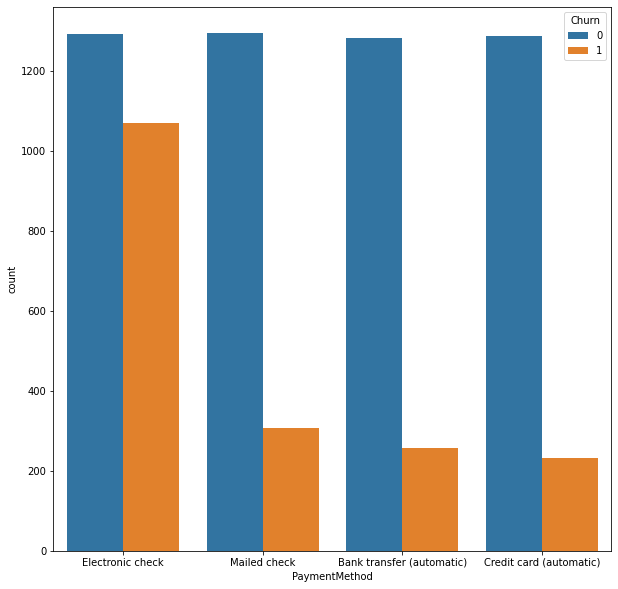

In [ ]:
for _ in column_cat:
  plot_categorical(_)

<Figure size 720x720 with 0 Axes>

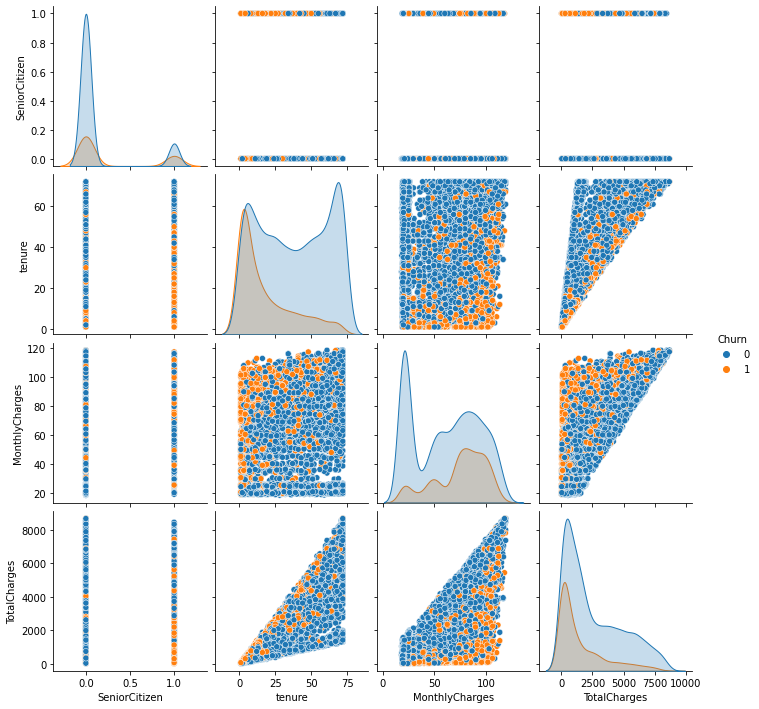

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data=df_data, hue ='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [ ]:
X = df_data_processing_scaled.drop('Churn', axis=1)
Y= df_data_processing_scaled['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0)
result = model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics
prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.795734597156398


## Evaluación del modelo

In [ ]:
model.predict_proba(x_test)

array([[0.9902118 , 0.0097882 ],
       [0.86177512, 0.13822488],
       [0.30193053, 0.69806947],
       ...,
       [0.99028271, 0.00971729],
       [0.70132406, 0.29867594],
       [0.82865273, 0.17134727]])

In [ ]:
model.coef_

array([[ 2.16456329e-01, -3.10072438e+00, -1.62275558e-01,
         1.19637002e+00,  9.38227765e-04, -2.24786684e-02,
        -7.14958453e-02,  4.99554047e-02,  1.16808125e-01,
        -1.38348565e-01,  8.51141942e-02, -1.06654635e-01,
        -1.58854568e-01,  8.51141942e-02,  5.21999335e-02,
        -4.17809899e-01,  5.11407650e-01, -1.15138192e-01,
         2.40091205e-01, -1.15138192e-01, -1.46493454e-01,
         8.40771354e-02, -1.15138192e-01,  9.52061616e-03,
         5.65202109e-02, -1.15138192e-01,  3.70775407e-02,
         2.20216931e-01, -1.15138192e-01, -1.26619180e-01,
        -8.59200111e-02, -1.15138192e-01,  1.79517763e-01,
        -8.76623695e-02, -1.15138192e-01,  1.81260121e-01,
         7.42705642e-01, -9.75380680e-02, -6.66708014e-01,
        -1.13990474e-01,  9.24500336e-02, -2.72553507e-03,
        -1.58698780e-01,  2.16924691e-01, -7.70408172e-02]])

In [ ]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.125;0.775x0.755)


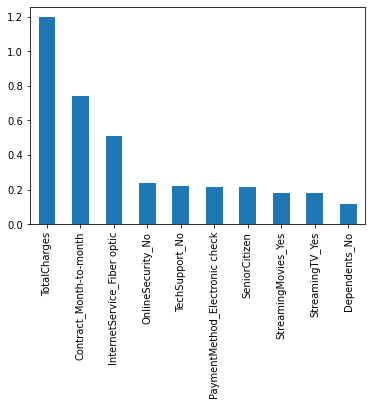

In [ ]:
weights = pd.Series(model.coef_[0],
                   index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.125;0.775x0.755)


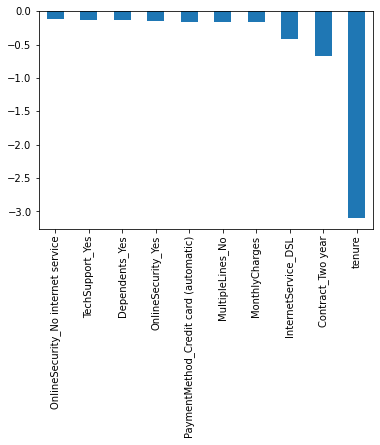

In [ ]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 720x720 with 0 Axes>

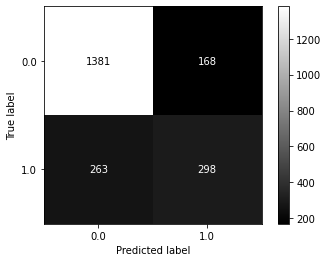

In [ ]:
figur =plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()